In [ ]:
import torch
import torch.nn as nn

In [8]:
import torch
from torch import nn

input = torch.randn(320, 32)
rnn = nn.GRU(input_size=32, hidden_size=8, num_layers=2, bidirectional=True)
output, hn = rnn(input)

print(input.size())
print(output.size())

torch.Size([320, 32])
torch.Size([320, 16])


In [2]:
from math import pi
C = pow(pi, 0.25)
print(C)

1.3313353638003897


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


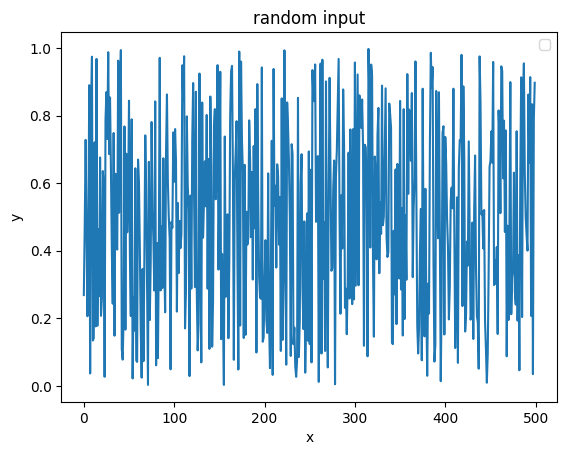

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rnd_input = np.random.rand(500)


plt.plot(rnd_input)
plt.title('random input')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [ ]:
def Laplace(p):
    A = 0.08
    ep = 0.03
    tal = 0.1
    f = 50
    w = 2 * pi * f
    q = torch.tensor(1 - pow(ep, 2))
    
    y = A * torch.exp((-ep / (torch.sqrt(q))) * (w * (p - tal))) * (-torch.sin(w * (p - tal)))
    return y

In [ ]:
def Morlet(p):
    C = pow(pi, 0.25)
    # p = 0.03 * p
    y = C * torch.exp(-torch.pow(p, 2) / 2) * torch.cos(2 * pi * p)
    return y

In [ ]:

class SelfAttentionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SelfAttentionModel, self).__init__()
        # 線性層用於對特徵嵌入進行線性轉換
        self.linear = nn.Linear(input_dim, hidden_dim)
        # 自注意力機制層
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=1)
        
    def forward(self, x):
        # 進行特徵嵌入的線性轉換
        x = self.linear(x)
        # 使用自注意力機制
        x, _ = self.attention(x, x, x)  # 對輸入x應用自注意力機制
        return x

# 創建模型
input_dim = 10  # 假設每個時間步有10個特徵
hidden_dim = 64  # 隱藏層維度
model = SelfAttentionModel(input_dim, hidden_dim)

# 輸入示例數據，這是一個批次大小為3，時間步數為5，特徵維度為10的數據
input_data = torch.rand(3, 5, 10)  # (batch_size, time_steps, input_dim)

# 前向傳播
output = model(input_data)

# 查看輸出形狀
print(output.shape)  # 將顯示 torch.Size([3, 5, 64])

In [ ]:

class WaveletKernelNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(WaveletKernelNetwork, self).__init()
        # Wavelet Kernel Network 部分，你可以根據需求擴展這部分
        self.wkn_layer = nn.Sequential(
            nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        
    def forward(self, x):
        x = self.wkn_layer(x)
        return x

class SelfAttentionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SelfAttentionModel, self).__init()
        # 線性層用於對特徵嵌入進行線性轉換
        self.linear = nn.Linear(input_dim, hidden_dim)
        # 自注意力機制層
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=1)
        
    def forward(self, x):
        # 進行特徵嵌入的線性轉換
        x = self.linear(x)
        # 使用自注意力機制
        x, _ = self.attention(x, x, x)  # 對輸入x應用自注意力機制
        return x

class WKN_LSTM_SelfAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(WKN_LSTM_SelfAttention, self).__init()
        # Wavelet Kernel Network 部分
        self.wkn = WaveletKernelNetwork(input_dim, hidden_dim)
        # LSTM 層
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        # 自注意力層
        self.self_attention = SelfAttentionModel(hidden_dim, hidden_dim)
        # 全連接層
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Wavelet Kernel Network 部分
        x = self.wkn(x)
        # LSTM 層
        x, _ = self.lstm(x)
        # 自注意力層
        x = self.self_attention(x)
        # 全連接層
        x = self.fc(x)
        return x


In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

folder_name = './viberation_dataset/Test_set/Bearing1_3/'
files = [file for file in sorted(os.listdir(folder_name)) if 'acc' in file]
# print(files)

hrz_data_list = []
for file in files:
    df_hrz = pd.read_csv(f'{folder_name}/{file}', header=None)
    df_hrz = df_hrz[4]
    hrz_data_list.append(df_hrz) 

hrz_data = np.array(hrz_data_list)
scaler = MinMaxScaler(feature_range=(-1, 1))
hrz_data = scaler.fit_transform(hrz_data)
print(hrz_data.shape)


(1802, 2560)


In [6]:
print(hrz_data)

[[ 0.2676105   0.34155955  0.30330634 ... -0.25097847 -0.07131609
  -0.00240481]
 [ 0.35877072  0.44335904  0.26889339 ... -0.59246575 -0.43622047
  -0.11142285]
 [ 0.47479282  0.6075407   0.55634278 ...  0.44178082  0.49876265
   0.1511022 ]
 ...
 [ 0.00690608  0.24250214  0.44568151 ...  0.35714286  0.49786277
   0.22725451]
 [ 0.17610497  0.14481577  0.07253711 ... -0.04305284 -0.15860517
  -0.15991984]
 [ 0.1426105   0.30831191  0.23650472 ... -0.31800391 -0.03172103
  -0.1743487 ]]


In [4]:
hrz_data_1d = hrz_data.reshape(-1)
print(hrz_data_1d.shape)

(4613120,)


In [7]:
print(hrz_data_1d)

[ 0.2676105   0.34155955  0.30330634 ... -0.31800391 -0.03172103
 -0.1743487 ]


In [9]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

folder_name = './viberation_dataset/Test_set/Bearing1_3/'
files = [file for file in sorted(os.listdir(folder_name)) if 'acc' in file]
        
df_points = 0
for file in files:
    df = pd.read_csv(f'{folder_name}/{file}', header=None)
    df_points += len(df)

label_data = np.linspace(1, 0, df_points)

print(label_data)

[1.00000000e+00 9.99999783e-01 9.99999566e-01 ... 4.33546154e-07
 2.16773077e-07 0.00000000e+00]


In [10]:
label_data.shape

(4613120,)

In [7]:
from src.model import *
import numpy as np
import torch

model = LA_WKN_BiGRU()
# model = Laplace_fast(32,64)

print(model)


LA_WKN_BiGRU(
  (WKN): Sequential(
    (0): Laplace_fast()
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv1d(32, 16, kernel_size=(32,), stride=(1,), padding=same)
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=same)
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (BiGRU): GRU(32, 8, bidirectional=True)
  (FC): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=64, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=64, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [5]:
a = np.random.rand(1, 2560)
a = torch.from_numpy(a.astype(np.float32))
print(a.shape)

y = model(a)
y

torch.Size([1, 2560])


tensor([[0.5357]], grad_fn=<SigmoidBackward0>)

In [8]:
c = Laplace(a)
# s = (c).view(32, 1, 63)
print(c.shape)

torch.Size([1, 2560])


In [18]:
out_channels = 32
a_ = nn.Parameter(torch.linspace(1, 10, out_channels)).view(-1, 1)
b_ = nn.Parameter(torch.linspace(0, 10, out_channels)).view(-1, 1)

time_disc = torch.linspace(0, 1, steps=int((63)))
p1 = time_disc.unsqueeze(0) - b_ / a_
laplace_filter = Laplace(p1)

laplace_filter.shape

torch.Size([32, 63])